## 1. Setup
#### Import Dependencies and Prep Image

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### 1a. Define Image Name and Image/Model Paths

In [448]:
IMAGE = "hay.jpg"
prototxt = "C:/Users/megha/Downloads/Photo_Video_Colorization/model/colorization_deploy_v2.prototxt"
model = "C:/Users/megha/Downloads/Photo_Video_Colorization/model/colorization_release_v2.caffemodel"
points = "C:/Users/megha/Downloads/Photo_Video_Colorization/model/pts_in_hull.npy"
image =  "C:/Users/megha/Downloads/Photo_Video_Colorization/input_images/" + IMAGE

#### 1b. Load serialized black and white colorizer model and cluster

In [316]:
net = cv2.dnn.readNetFromCaffe(prototxt, model)
pts = np.load(points)

#### 1c. Add the cluster centers as 1x1 convolutions to the model

In [317]:
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

#### 1d. Load the input image, scale it, and convert it to grayscale
This isn't always needed, but some images have been discolored over the years and colorization may work better with a true grayscale applied to them

In [449]:
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

#### 1e. Show image

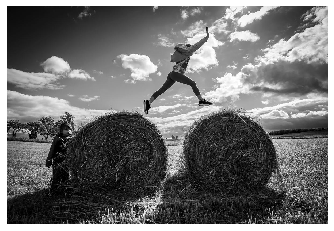

In [450]:
plt.imshow(image)
plt.axis('off');

### 2. Begin Colorization Process
##### Rescale image and convert to Lab

In [451]:
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_RGB2LAB)
resized = cv2.resize(lab, (224, 224))
L = cv2.split(resized)[0]
L -= 50

#### 2a. Predict "a" and "b"

In [452]:
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

#### 2b. Create colorized Lab photo (L+a+b) and preview it

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


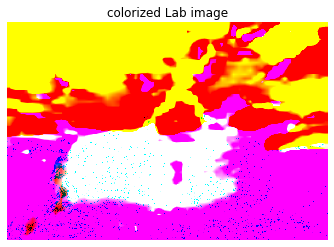

In [453]:
L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)
plt.imshow(colorized)
plt.axis('off');
plt.title('colorized Lab image');

#### 2c. Lab doesn't tell us much....let's look at the RGB!

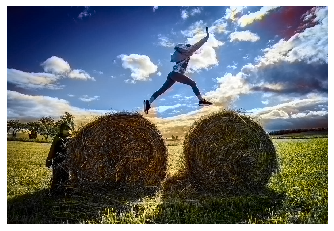

In [454]:
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
colorized = np.clip(colorized, 0, 1)
colorized = (255 * colorized).astype("uint8")
plt.imshow(colorized)
plt.axis('off');

#### 2d. Save the colorized photo and verify the save worked

In [455]:
cv2.imwrite("C:/Users/megha/Downloads/Photo_Video_Colorization/colorized_images/Color_"+IMAGE, cv2.cvtColor(colorized, cv2.COLOR_RGB2BGR))

True